In [1]:
import pandas as pd
import pickle as pkl
import os

In [25]:
path = os.getcwd()
files = os.listdir()
file_column, language_column = [], []
for file in files:
    if file[-3:] == "pkl":
        try:
            with open(path+"/"+file,'rb') as f:
                curr_dict = pkl.load(f)
                print(file,curr_dict)
                for key,value in curr_dict.items():
                    file_column.append(key)
                    language_column.append(value)
        
        except TypeError:
            pass

corruptions_dict14.pkl {'metropolitancityofvenice_Martinamanzari_m69437_a86181_audio.wav': 'corrupted'}
corruptions_dict30.pkl {}
predictions_dict4.pkl {'metropolitancityofvenice_Martatoti_m69461_a86205_audio_converted.mp3': 'Italian', 'guatemalacity_ivan072_m67767_a84511_audio_converted.mp3': 'Latin', 'santiagodecompostela_Carmenvillalobos_m67573_a84317_audio_converted.mp3': 'Spanish', 'metropolitancityofvenice_mario85_m68822_a85566_audio_converted.mp3': 'Italian', 'wroclaw_Tadzio_m68146_a84890_audio_converted.mp3': 'Polish', 'guatemalacity_ivan072_m67796_a84540_audio_converted.mp3': 'Catalan', 'metropolitancityofvenice_AnitaH_m69626_a86370_audio_converted.mp3': 'Italian', 'castello_Oriol_m67217_a83962_audio_converted.mp3': 'Galician', 'barcelona_Ovvero_m70630_a87374_audio_converted.mp3': 'Catalan', 'wroclaw_dominikad_m68034_a84778_audio_converted.mp3': 'Polish', 'cuenca_Amalia_m69906_a86650_audio_converted.mp3': 'Galician', 'metropolitancityofvenice_GiulioTesti_m68752_a85496_audio_co

In [26]:
db = pd.DataFrame.from_dict({"file":file_column,"language":language_column})
db

,file,language
0,metropolitancityofvenice_Martinamanzari_m69437...,corrupted
1,metropolitancityofvenice_Martatoti_m69461_a862...,Italian
2,guatemalacity_ivan072_m67767_a84511_audio_conv...,Latin
3,santiagodecompostela_Carmenvillalobos_m67573_a...,Spanish
4,metropolitancityofvenice_mario85_m68822_a85566...,Italian
...,...,...
4808,metropolitancityofvenice_Giulia_m68497_a85241_...,Italian
4809,metropolitancityofvenice_intrepida_m68672_a854...,Italian
4810,barcelona_Ovvero_m71533_a88277_audio_converted...,Catalan
4811,berlin_Wooki_m67411_a84155_audio_converted.mp3,Sundanese


In [28]:
db['language'].unique()

array(['corrupted', 'Italian', 'Latin', 'Spanish', 'Polish', 'Catalan',
       'Galician', 'Bosnian', 'Belarusian', 'German', 'Sundanese',
       'Norwegian Nynorsk', 'Portuguese', 'Welsh', 'Javanese',
       'Macedonian', 'Slovenian', 'Esperanto', 'Greek', 'English',
       'Basque', 'Occitan', 'Hawaiian', 'Waray', 'Yoruba', 'Malay',
       'Norwegian', 'Vietnamese', 'Somali', 'Dutch', 'Luxembourgish',
       'Burmese', 'Tagalog', 'French', 'Faroese', 'Croatian', 'Albanian',
       'Latvian', 'Shona', 'Uzbek', 'Swahili', 'Icelandic', 'Sindhi',
       'Danish', 'Breton', 'Swedish', 'Czech', 'Ukrainian', 'Afrikaans',
       'Romanian', 'Marathi', 'Maltese', 'Russian', 'Hindi', 'Hausa',
       'Tamil', 'Tibetan', 'Malayalam', 'Indonesian', 'Manx', 'Hebrew',
       'Slovak', 'Chinese', 'Maori', 'Urdu', 'Persian', 'Serbian',
       'Finnish', 'Georgian', 'Kazakh', 'Telugu', 'Thai', 'Haitian',
       'Hungarian', 'Tajik', 'Arabic', 'Bengali', 'Amharic', 'Tatar',
       'Bulgarian', 'Mongoli

In [ ]:
x, y = [], []
for i,j in zip(db['language'].value_counts().index, db['language'].value_counts()):
    x.append(j)
    y.append(i)

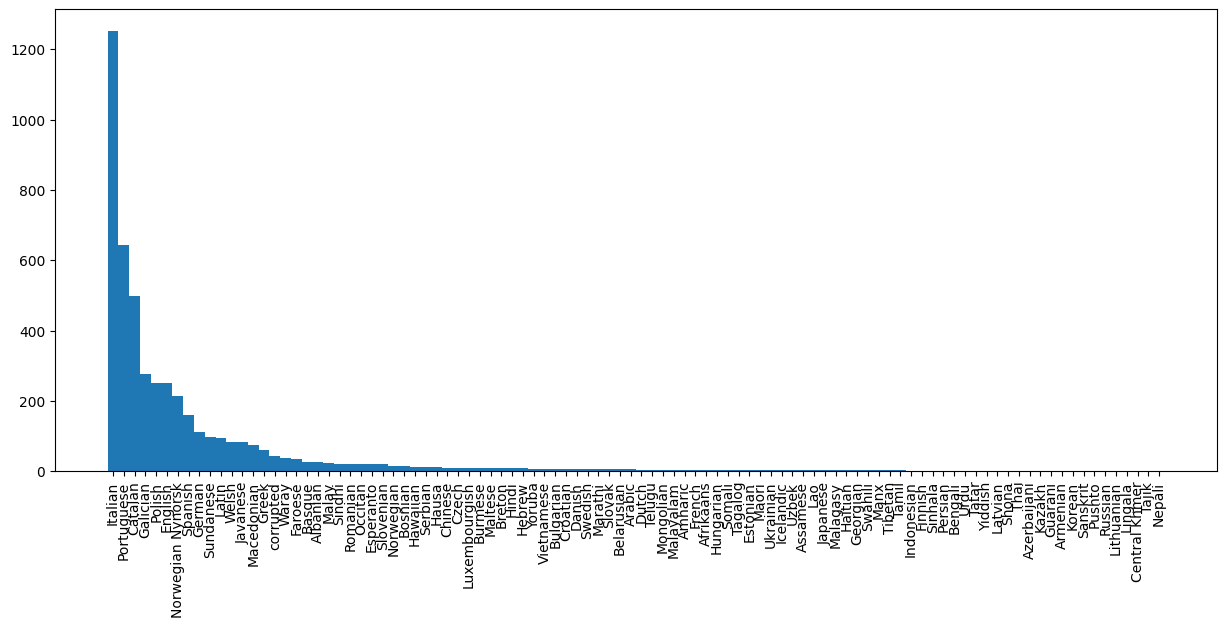

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(y, x, width = 1)
plt.xticks(rotation=90)
plt.show()

There are too many languages with close to zero values, they could be removed and a numbre should be decided in the future. For testing I set it to -1 to pick everything

In [59]:
languages_to_use = []
for i,j in zip(db['language'].value_counts().index, db['language'].value_counts()):
    if j > -1:
        languages_to_use.append(i)
languages_to_use

['Italian',
 'Portuguese',
 'Catalan',
 'Galician',
 'Polish',
 'English',
 'Norwegian Nynorsk',
 'Spanish',
 'German',
 'Sundanese',
 'Latin',
 'Welsh',
 'Javanese',
 'Macedonian',
 'Greek',
 'corrupted',
 'Waray',
 'Faroese',
 'Basque',
 'Albanian',
 'Malay',
 'Sindhi',
 'Romanian',
 'Occitan',
 'Esperanto',
 'Slovenian',
 'Norwegian',
 'Bosnian',
 'Hawaiian',
 'Serbian',
 'Hausa',
 'Chinese',
 'Czech',
 'Luxembourgish',
 'Burmese',
 'Maltese',
 'Breton',
 'Hindi',
 'Hebrew',
 'Yoruba',
 'Vietnamese',
 'Bulgarian',
 'Croatian',
 'Danish',
 'Swedish',
 'Marathi',
 'Slovak',
 'Belarusian',
 'Arabic',
 'Dutch',
 'Telugu',
 'Mongolian',
 'Malayalam',
 'Amharic',
 'French',
 'Afrikaans',
 'Hungarian',
 'Somali',
 'Tagalog',
 'Estonian',
 'Maori',
 'Ukrainian',
 'Icelandic',
 'Uzbek',
 'Assamese',
 'Lao',
 'Japanese',
 'Malagasy',
 'Haitian',
 'Georgian',
 'Swahili',
 'Manx',
 'Tibetan',
 'Tamil',
 'Indonesian',
 'Finnish',
 'Sinhala',
 'Persian',
 'Bengali',
 'Urdu',
 'Tatar',
 'Yiddish',

In [60]:
db.loc[db['language'].isin(languages_to_use)]

,file,language
0,metropolitancityofvenice_Martinamanzari_m69437...,corrupted
1,metropolitancityofvenice_Martatoti_m69461_a862...,Italian
2,guatemalacity_ivan072_m67767_a84511_audio_conv...,Latin
3,santiagodecompostela_Carmenvillalobos_m67573_a...,Spanish
4,metropolitancityofvenice_mario85_m68822_a85566...,Italian
...,...,...
4808,metropolitancityofvenice_Giulia_m68497_a85241_...,Italian
4809,metropolitancityofvenice_intrepida_m68672_a854...,Italian
4810,barcelona_Ovvero_m71533_a88277_audio_converted...,Catalan
4811,berlin_Wooki_m67411_a84155_audio_converted.mp3,Sundanese


In [61]:
db.to_csv(path+"/"+"file_language.csv")